In [1]:
import collections
from csv import DictReader
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
season16_17 = DictReader(open('podatki/season-1617_csv.csv', 'rt', encoding='utf-8'))
season17_18 = DictReader(open('podatki/season-1718_csv.csv', 'rt', encoding='utf-8'))
season18_19 = DictReader(open('podatki/season-1819_csv.csv', 'rt', encoding='utf-8'))

In [3]:
class Referee:
    '''
    Podatki na voljo v zvezi s sodnikom:
        Referee = Match Referee
        HF = Home Team Fouls Committed
        AF = Away Team Fouls Committed
        HO = Home Team Offsides
        AO = Away Team Offsides
        HY = Home Team Yellow Cards
        AY = Away Team Yellow Cards
        HR = Home Team Red Cards
        AR = Away Team Red Cards
        HBP = Home Team Bookings Points (10 = yellow, 25 = red)
        ABP = Away Team Bookings Points (10 = yellow, 25 = red)
    '''

    # dict  {ime priimek: objekt}
    # dict[imepriimek].refereed_games

    def __init__(self, name):
        # Ime sodnika v formatu "'Prva črka imena' Priimek"

        self.name = name

        # Sojene tekme: tekme v katerih je bil glaven sodnik
        # Dodajajo se objekti "Match"
        self.refereed_games = []

        # Rumeni kartoni (razdeljeni na domače/goste):
        self.yellow_cards_home = 0
        self.yellow_cards_away = 0

        # Rdeči kartoni:
        self.red_cards_home = 0
        self.red_cards_away = 0

        # Skupno število točk od kartonov (10 = rumen, 25 = rdeč)
        self.booking_points = 0

        # Sojeni prekrški
        self.home_team_fouls = 0
        self.away_team_fouls = 0

    def add_all(self, cards, match):
        self.add_cards(cards)
        self.add_match(match)

    def add_cards(self, cards):
        # cards seznam kartonov v formatu [hy, ay, hr, ar]
        hy = int(cards[0])
        ay = int(cards[1])
        hr = int(cards[2])
        ar = int(cards[3])
        self.yellow_cards_home += hy
        self.yellow_cards_away += ay
        self.red_cards_home += hr
        self.red_cards_away += ar

        self.booking_points += (hy + ay) * 10 + (hr + ar) * 25

    def add_match(self, match):
        self.refereed_games.append(match)

    def to_string(self):
        return (self.name)

    def get_cards(self):
        return ([self.yellow_cards_home + self.yellow_cards_away, self.red_cards_home + self.red_cards_away])


class Match:
    '''
     Podatki na voljo:
        Div = League Division
        Date = Match Date (dd/mm/yy)
        HomeTeam = Home Team
        AwayTeam = Away Team
        FTHG = Full Time Home Team Goals
        FTAG = Full Time Away Team Goals
        FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
        HTHG = Half Time Home Team Goals
        HTAG = Half Time Away Team Goals
        HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

        Match Statistics (where available)
        Attendance = Crowd Attendance
        Referee = Match Referee
        HTS = Home Team Shots
        ATS = Away Team Shots
        HST = Home Team Shots on Target
        AST = Away Team Shots on Target
        HHW = Home Team Hit Woodwork
        AHW = Away Team Hit Woodwork
        HC = Home Team Corners
        AC = Away Team Corners
        HF = Home Team Fouls Committed
        AF = Away Team Fouls Committed
        HO = Home Team Offsides
        AO = Away Team Offsides
        HY = Home Team Yellow Cards
        AY = Away Team Yellow Cards
        HR = Home Team Red Cards
        AR = Away Team Red Cards
    '''

    def __init__(self, date, home_team, away_team, fthg, ftag, ftr, hthg,
                 htr, hts, ats, hst, ast, hc, ac, hf, af, hy, ay, hr, ar):
        self.date = date
        self.home_team = home_team
        self.away_team = away_team
        self.fthg = fthg
        self.ftag = ftag
        self.ftr = ftr
        self.hthg = hthg
        self.htr = htr
        self.hts = hts
        self.ats = ats
        self.hst = hst
        self.ast = ast
        self.hc = hc
        self.ac = ac
        self.hf = hf
        self.af = af
        self.hy = hy
        self.ay = ay
        self.hr = hr
        self.ar = ar

    def to_string(self):
        out = "{} {}{} - {}{}".format(self.date, self.home_team, self.fthg, self.ftag, self.away_team)
        return out


class Team:
    '''
        Div = League Division
        Date = Match Date (dd/mm/yy)
        FTHG = Full Time Home Team Goals
        FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
        HTHG = Half Time Home Team Goals
        HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

        Match Statistics (where available)
        Attendance = Crowd Attendance
        Referee = Match Referee
        HS = Home Team Shots
        HST = Home Team Shots on Target
        HHW = Home Team Hit Woodwork
        HC = Home Team Corners
        HF = Home Team Fouls Committed
        HO = Home Team Offsides
        HY = Home Team Yellow Cards
        HR = Home Team Red Cards
        HBP = Home Team Bookings Points (10 = yellow, 25 = red)


    '''

    def __init__(self, name, division, ):
        self.name = name
        self.division = division
        self.goals_scored = 0
        self.goals_conceded = 0
        self.yellow_cards = 0
        self.red_cards = 0
        self.points = 0

        self.win = 0
        self.loss = 0
        self.draw = 0

        self.home_goals = 0
        self.away_goals = 0

        self.home_shots = 0
        self.away_shots = 0

        self.home_shots_on_target = 0
        self.away_shots_on_target = 0

        self.home_points = 0
        self.away_points = 0

    def add_all(self, gs, gc, yc, rc):
        self.goals_scored += int(gs)
        self.goals_conceded += int(gc)
        self.yellow_cards += int(yc)
        self.red_cards += int(rc)

        if gs > gc:
            # self.win += 1
            self.points += 3
        if gs == gc:
            # self.draw += 1
            self.points += 1
        else:
            pass
            # self.loss += 1

    def to_string(self):
        return "{} {}".format(self.name, self.division)




In [4]:
sezone_referees = []
sezone_teams = []


# referee_dict = {}
# {"Ime ekipe": objekt}
# teams_dict = defaultdict(Team)
# teams_dict = {}


def read_data(data):
    referee_dict = {}
    teams_dict = {}
    betting_sites = {"365": 0, "IW": 0, "BW": 0}

    for row in data:
        div = row["Div"]
        date = row["Date"]
        home_team = row["HomeTeam"]
        away_team = row["AwayTeam"]
        # home_hit_woodwork = row["HHW"]
        # away_hit_woodwork = row["AHW"]

        full_time_away_goals = row["FTAG"]
        full_time_home_goals = row["FTHG"]
        full_time_result = row["FTR"]
        half_time_home_goals = row["HTHG"]

        htag = row["HTAG"]
        half_time_result = row["HTR"]
        referee = row["Referee"]
        hts = row["HS"]
        ats = row["AS"]
        hst = row["HST"]
        ast = row["AST"]
        home_fouls = row["HF"]
        af = row["AF"]
        # home_team_offsides = row["HO"]
        # away_team_offsides = row["AO"]
        hc = row["HC"]
        ac = row["AC"]
        home_yellow = row["HY"]
        away_yellow = row["AY"]
        home_red = row["HR"]
        away_red = row["AR"]
        '''
        B365H = Bet365 home win odds
        B365D = Bet365 draw odds
        B365A = Bet365 away win odds
        IWH = Interwetten home win odds
        IWD = Interwetten draw odds
        IWA = Interwetten away win odds
        BWH = Bet&Win home win odds
        BWD = Bet&Win draw odds
        BWA = Bet&Win away win odds
        '''

        home_365 = row["B365H"]
        draw_365 = row["B365D"]
        away_365 = row["B365A"]

        home_IW = row["IWH"]
        draw_IW = row["IWD"]
        away_IW = row["IWA"]

        home_BW = row["BWH"]
        draw_BW = row["BWD"]
        away_BW = row["BWA"]

        curr_referee = ""
        curr_match = ""

        try:
            curr_referee = referee_dict[referee]
        except KeyError:
            curr_referee = Referee(referee)
            referee_dict[referee] = curr_referee

        curr_match = Match(date, home_team, away_team, full_time_home_goals, full_time_away_goals, full_time_result,
                           half_time_home_goals, half_time_result, hts, ats,
                           hst, ast, hc, ac, home_fouls, af, home_yellow, away_yellow, home_red, away_red)

        referee_dict[referee].add_all([home_yellow, away_yellow, home_red, away_red], curr_match)
        curr_home_team = curr_away_team = ""



        try:
            curr_home_team = teams_dict[home_team]
            curr_away_team = teams_dict[away_team]
        except KeyError:
            curr_home_team = Team(home_team, div)
            curr_away_team = Team(away_team, div)

            teams_dict[home_team] = curr_home_team
            teams_dict[away_team] = curr_away_team

        if full_time_result == "H":
            curr_home_team.win += 1
            curr_away_team.loss += 1

            curr_home_team.home_points += 3

            betting_sites["365"] += float(home_365) - 1
            betting_sites["IW"] += float(home_IW) - 1
            betting_sites["BW"] += float(home_BW) - 1

        if full_time_result == "A":
            curr_home_team.loss += 1
            curr_away_team.win += 1

            curr_away_team.away_points += 3

            betting_sites["365"] += float(away_365) - 1
            betting_sites["IW"] += float(away_IW) - 1
            betting_sites["BW"] += float(away_BW) - 1

        if full_time_result == "D":
            curr_home_team.draw += 1
            curr_away_team.draw += 1

            curr_home_team.home_points += 1
            curr_away_team.away_points += 1


            betting_sites["365"] += (float(draw_365) - 1)
            betting_sites["IW"] += (float(draw_IW) - 1)
            betting_sites["BW"] += (float(draw_BW) - 1)

        curr_home_team.home_goals += int(full_time_home_goals)
        curr_away_team.away_goals += int(full_time_away_goals)

        curr_home_team.home_shots += int(hts)
        curr_away_team.away_shots += int(ats)

        curr_home_team.home_shots_on_target += int(hst)
        curr_away_team.away_shots_on_target += int(ast)



        curr_home_team.add_all(full_time_home_goals, full_time_away_goals,
                               home_yellow, home_red)
        curr_away_team.add_all(full_time_away_goals, full_time_home_goals,
                               away_yellow, away_red)

    return (referee_dict, teams_dict, betting_sites)


'''
referees, teams, betting_sites = read_data(season16_17)
sezone_referees.append(referees)
sezone_teams.append(teams)

referees, teams, betting_sites = read_data(season17_18)
sezone_referees.append(referees)
sezone_teams.append(teams)
'''

referees, teams, betting_sites = read_data(season18_19)
sezone_referees.append(referees)
sezone_teams.append(teams)
# print(referee_dict.items())

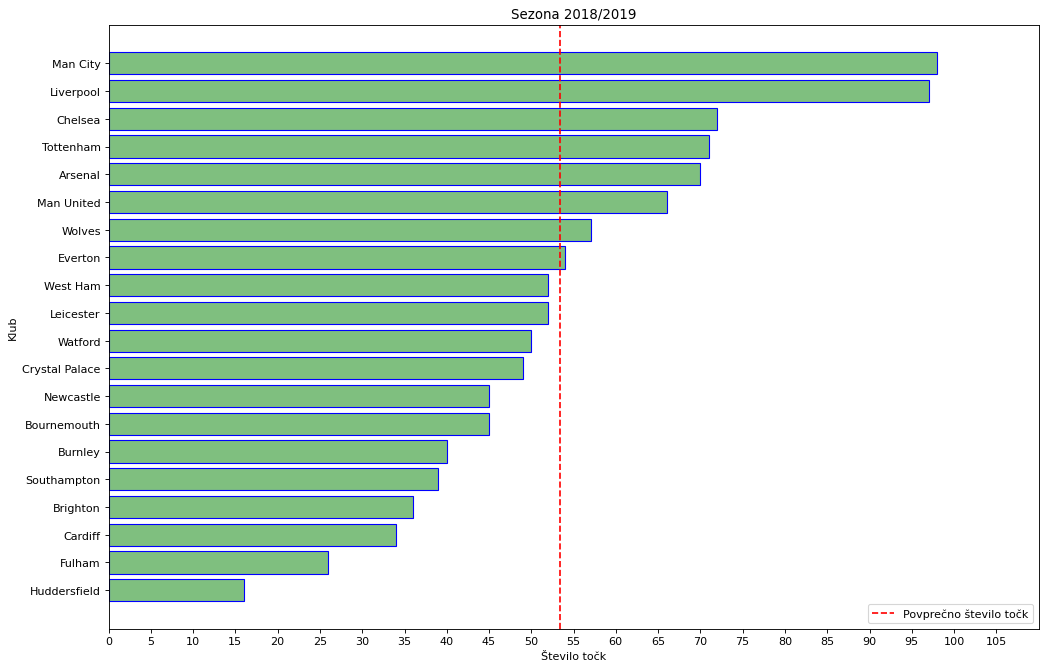

In [5]:
import pandas as pd
from matplotlib.pyplot import figure
import numpy as np
from matplotlib.pyplot import xticks

all_points = []
all_teams = []

for sezona in sezone_teams:
    label_teams = list(sezona.keys())
    all_teams.append(label_teams)
    label_object = sezona.values()
    temp = []
    for team in label_object:
        temp.append(int(team.points))
    all_points.append(temp)

#Prikažemo sam zadnjo sezono
last_season = zip([all_points[-1]], [all_teams[-1]])
    
for p, t in last_season:
    p, t = zip(*sorted([[a,b] for a, b in zip(p, t)], key=lambda item: item[0], reverse=False))
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    xticks(np.arange(0, max(p)+10, step=5))
    
    plt.title("Sezona 2018/2019")
    plt.ylabel("Klub")
    plt.xlabel("Število točk")
    
    plt.barh(t, p,color=(0, 0.5, 0, 0.5), edgecolor='blue')
    plt.axvline(x=np.mean(p), label="Povprečno število točk", c='r', linestyle="--")

    plt.xlim([0,110])
    plt.legend(loc='lower right')

Zgornji graf prikazuje točke klubov v sezoni 2018/2019. Rdeča črtkana črta prikazuje povprečno število točk klubov.

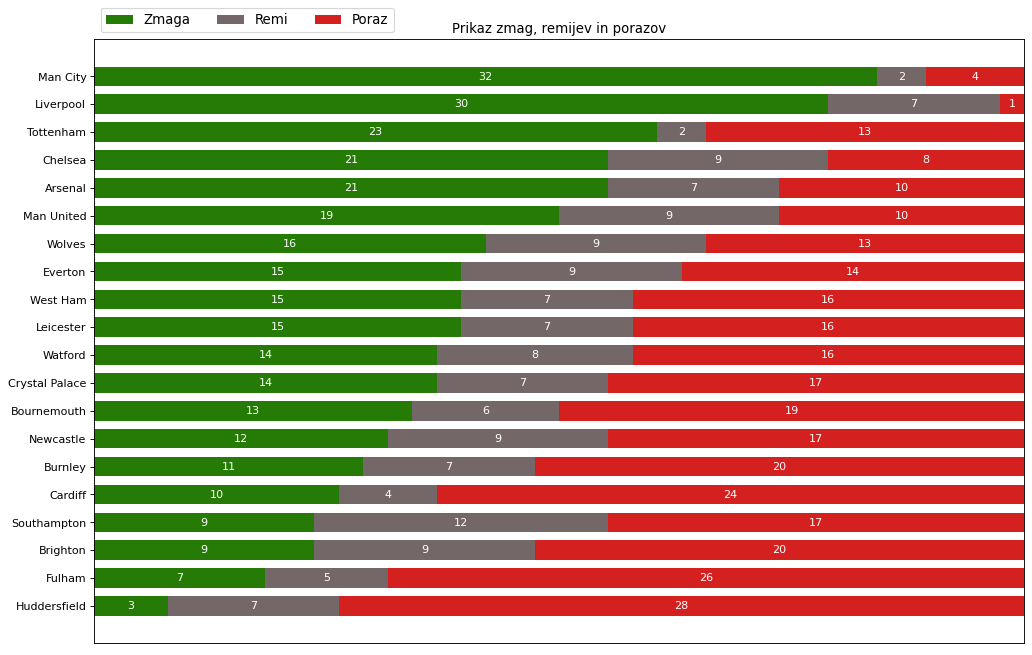

In [6]:
results = defaultdict(list)

for k, v in sezone_teams[-1].items():
    results[k] = [v.win, v.draw, v.loss]
cat = ['Zmaga', 'Remi', 'Poraz']

results = {k:v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=False)}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    
    plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.title("Prikaz zmag, remijev in porazov")
    xticks([])
    plt.xlim([0,38])

    
    category_colors = [
        [37/255, 123/255, 5/255, 1],
        [116/255, 103/255, 103/255, 1],
        [213/255, 32/255, 32/255, 1]
        
    ]
    
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        plt.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            plt.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
            plt.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='large')

survey(results, cat)
plt.show()

Na zgornjem grafu vidimo kako so ekipe pridobile točke. Opazimo recimo razlike v porazih in remijih med prvima dvema kluboma, kjer je Liverpool imel 3 manj poraze kot Man City a je zaradi velikega števila remijev končal na drugem mestu. <br>
To vidimo tudi na dnu tabele pri primerjavi med Cardiffom in Brightonom, kateri je izpadel iz lige čeprav je imel 4 manj poraze kot Cardiff.

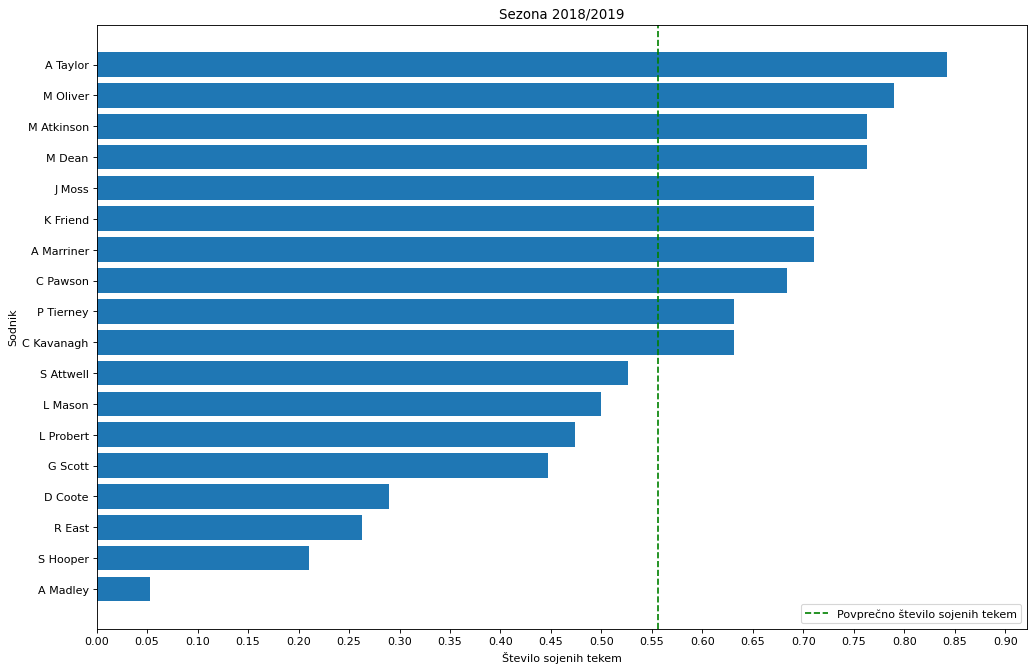

In [7]:

season_labels = ["2016/2017", "2017/2018", "2018/2019"]

last_season = [sezone_referees[-1]]
for i, season in enumerate(last_season):
    season = sorted([(k,v) for k,v in season.items()], key=lambda item: len(item[1].refereed_games),reverse=False)
    sodniki = [k for k,v in season]
    tekme = [len(v.refereed_games)/38 for k,v in season]
    

    
    figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
    


    
    plt.title("Sezona 2018/2019")
    plt.ylabel("Sodnik")
    plt.xlabel("Število sojenih tekem")
    
    plt.barh(sodniki, tekme)
    plt.axvline(x=np.mean(tekme), label="Povprečno število sojenih tekem", c='g', linestyle="--")
    xticks(np.arange(0, 1, step=0.05))
    plt.xlim([0,35/38])
    plt.legend(loc='lower right')
plt.show()
    
    

Zgornji graf prikazuje povprečno število sojenih tekem pri vsakem sodniku. Vidimo da je Anthony Taylor sodil skoraj 0.85 tekme povprečno na teden, torej je sodil skoraj vsak teden.<br>
Vidimo tudi da povprečni sodnik sodi vsaki drugi teden, torej eno tekmo na dva tedna.<br> 
Iz tega lahko sklepamo, kateri sodniki so najbolj izkušeni ter morda tudi najbolj utrujeni. 

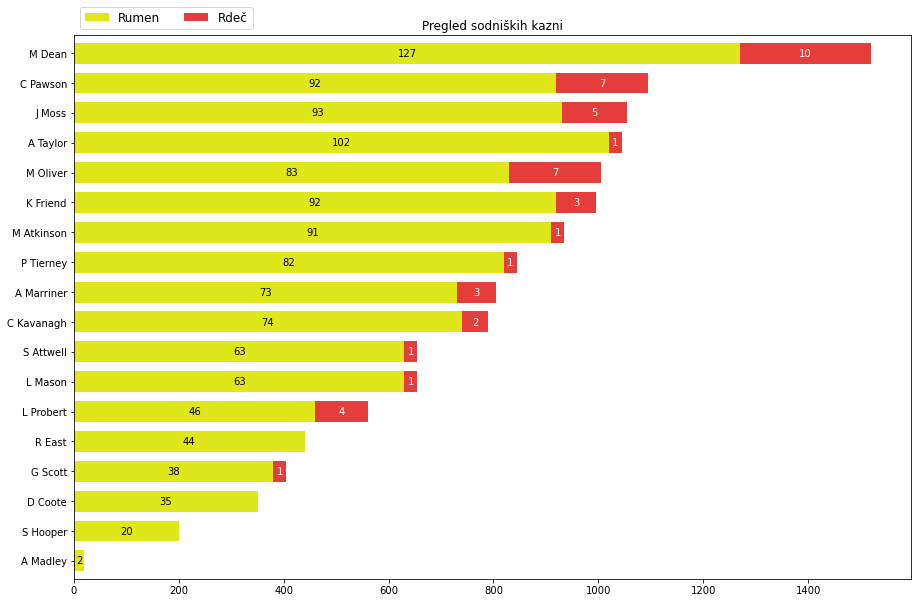

In [8]:
season_labels = ["2016/2017", "2017/2018", "2018/2019"]

last_season = [sezone_referees[-1]]
for i, season in enumerate(last_season):
    season = sorted([(k,v) for k,v in season.items()], key=lambda item: item[1].booking_points,reverse=False)
    sodniki = [k for k,v in season]
        
    kartoni = [v.booking_points for k,v in season]
        
    fig, ax = plt.subplots(facecolor='white', figsize=(15,10), edgecolor='k')
    
    
    width = 0.9
    
    yellows = [v.get_cards()[0]*10 for k, v in season]
    red = [v.get_cards()[1]*25 for k, v in season]
        
    category_colors = [
        [223/255, 230/255, 25/255, 1],
        [229/255, 60/255, 60/255, 1]
    ]    
        
    
    df0 = pd.DataFrame({'Rumen':yellows,'Rdeč':red}, columns=['Rumen', 'Rdeč'],
                       index=sodniki)
    df0.plot.barh(ax=ax, stacked=True, color=category_colors, width=0.7)
    
    plt.title("Pregled sodniških kazni")
    plt.legend(ncol=2, bbox_to_anchor=(0, 1),
                  loc='lower left', fontsize='large')
    
    
    for y, (yellow, redC) in enumerate(zip(yellows, red)):        
        ax.text(yellow/2, y, str(int(yellow/10)), ha='center', va='center',
                    color='black')
        if redC > 0:
             ax.text(yellow + redC/2, y, str(int(redC/25)), ha='center', va='center',
                     color='white')     
                
    
plt.show()

Števila na x osi nam povejo kakšen je izračun skupnih kazni kjer so rumeni kartoni vredni 10 točk in rdeči 25.

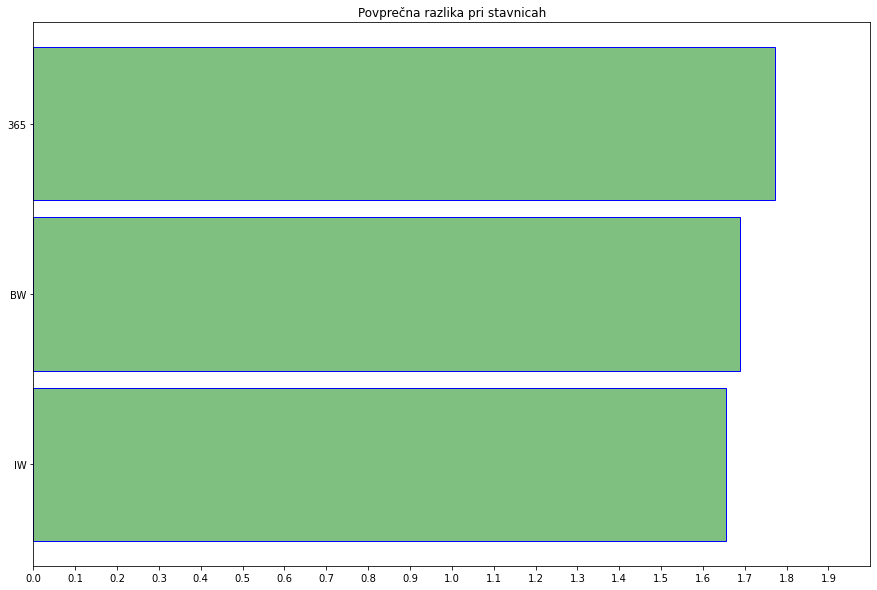

In [9]:
sites = [k for k,v in sorted(betting_sites.items(), key=lambda item:item[1], reverse=False)]
sums = [v/380 for k,v in sorted(betting_sites.items(), key=lambda item:item[1], reverse=False)]

fig, ax = plt.subplots(facecolor='white', figsize=(15,10), edgecolor='k')
plt.title("Povprečna razlika pri stavnicah")
plt.barh(sites, sums,color=(0, 0.5, 0, 0.5), edgecolor='blue', height=0.9)

xticks(np.arange(0, max(sums)+0.2, step=0.1))
_=plt.xlim([0,2])
    
    


Graf prikazuje kako pravilno so stavnice napovedovale rezultate skozi sezono 2018/2019. Vrednost na x predstavlja povprečen seštevek razlik pri vsaki tekmi, npr. stavnica 365 je za tekmo predstavila naslednje kvote: H:2.4, A:3.25, D:3.3, rezultat pa je bil izenačen, torej smo 365 prišteli razliko 3.3 - 1, kjer 1 pomeni pravilno napovedan rezultat. <br>
Graf predstavlja povprečje teh vrednosti, katere nam npr. povejo kje se najbolj splača stavit in katera stavnica se je najbolj približala dejanskim rezultatom.

In [10]:
all_fouls = dict()
all_cards = dict()
last_season = [sezone_referees[-1]]
for i, season in enumerate(last_season):
    season = sorted([(k,v) for k,v in season.items()], key=lambda item: len(item[1].refereed_games),reverse=False)
    for k, referee in season:
        for match in referee.refereed_games:
            home = match.home_team
            home_fouls = int(match.hf)
            away = match.away_team
            away_fouls = int(match.af)
            
            home_yellow = int(match.hy)
            home_red = int(match.hr)
            away_yellow = int(match.ay)
            away_red = int(match.ar)
            
            if home not in all_cards:
                all_cards[home] = [home_yellow,home_red]
            else:
                all_cards[home][0] += home_yellow
                all_cards[home][1] += home_red
            
            if away not in all_fouls:
                all_cards[away] = [away_yellow,away_red]
                
            else:
                all_cards[away][0] += away_yellow
                all_cards[away][1] += away_red
            

            if home not in all_fouls:
                all_fouls[home] = [home_fouls,0]
            else:
                all_fouls[home][0] += home_fouls
            
            if away not in all_fouls:
                all_fouls[away] = [0,away_fouls]
                
            else:
                all_fouls[away][1] += away_fouls


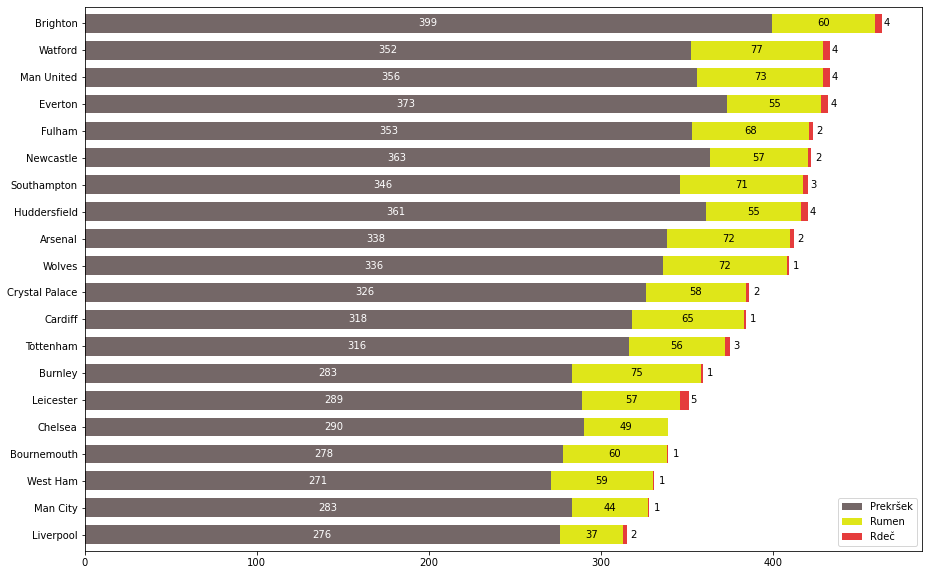

In [11]:
labels = list(all_fouls.keys())
f = list(all_fouls.values())
new_f = []

for i,j in f:
    new_f.append(i+j)

labels = [x for _,x in sorted(zip(new_f,labels))]
new_f = sorted(new_f)

wry = []
yellows = []
red = []
for l, f in zip(labels,new_f):
    yellows.append(all_cards[l][0])
    red.append(all_cards[l][1])
    
    f = f - all_cards[l][0] - all_cards[l][1]
    wry.append(f)


    
    
category_colors = [
        [116/255, 103/255, 103/255, 1],
        [223/255, 230/255, 25/255, 1],
        [229/255, 60/255, 60/255, 1]
]    
        
fig, ax = plt.subplots(facecolor='white', figsize=(15,10), edgecolor='k')    
df0 = pd.DataFrame({'Prekršek':wry,'Rumen':yellows,'Rdeč':red}, columns=['Prekršek','Rumen', 'Rdeč'],
                       index=labels)
df0.plot.barh(ax=ax, stacked=True, color=category_colors, width=0.7)    

for y, (p, yellow, redC) in enumerate(zip(wry, yellows, red)):      
    #print(p, yellow, redC)
    ax.text(p/2, y, str(int(p)), ha='center', va='center',
    color='white')
    
    ax.text(p+ yellow/2, y, str(int(yellow)), ha='center', va='center',
    color='black')
    if redC > 0:
        ax.text( p + yellow + redC/2 + 5, y, str(int(redC)), ha='center', va='center',
        color='black')     
                
    
#fig, ax = plt.subplots(facecolor='white', figsize=(15,10), edgecolor='k')
#plt.barh(labels,wry)  

plt.show()

Graf prikazuje število storjenih prekrškov za vsak klub, ter kolikšen del teh prekrškov je bil kaznovan z kartonom. 

Iz zgornjega grafa nemoremo direktno sklepati posest žoge, da nam pa idejo na kakšen način igrajo ekipe. Skok v prekrških je na sredini kar velik, zato lahko sklepamo da nad sredino ekipe igrajo grobo igro.

In [12]:
print(teams["Liverpool"].goals_scored)

89


In [13]:
def tornadoPlot(year):
    women = df[ (df["Time"]==year) & (df["LocID"]==index) ]["PopFemale"].values
    men = df[ (df["Time"]==year) & (df["LocID"]==index) ]["PopMale"].values
    
    
    for i in range(len(women)):
        women[i] /= 1000
        men[i] /= 1000
        
    print(f"Leto: {year}, Število vseh žensk: {round(sum(women), 2)} mil, Število vseh moških: {round(sum(men), 2)} mil")

    
    spans = []
    for span in np.arange(0, 5*len(men)-1, 5):
        spans.append(f"{span}-{span+5}")
    num_spans = len(spans)
    
    pos = np.arange(num_spans) + .5 

    fig = plt.figure(figsize=(15, 10), facecolor='white', edgecolor='none')
    
    fig.suptitle(f"Prikaz prebivalstva v letu {year}")

    ax_women = fig.add_axes([0.10, 0.1, 0.35, 0.8])
    ax_men = fig.add_axes([0.55, 0.1, 0.35, 0.8]) 

    for loc, spine in ax_women.spines.items():
        if loc!='right':
            spine.set_color('none') # don't draw spine

    for loc, spine in ax_men.spines.items():
        if loc!='left':
            spine.set_color('none') # don't draw spine 

    ax_women.xaxis.set_ticks_position('top')
    ax_men.xaxis.set_ticks_position('top')  

    ax_women.barh(pos, women, align='center',facecolor='#DBE3C2', edgecolor='None')
    ax_women.set_yticks([])
    ax_women.invert_xaxis() 

    ax_men.barh(pos, men, align='center', facecolor='#D8E2E1',
    edgecolor='None')
    ax_men.set_yticks([])

    import matplotlib.transforms as transforms
    transform = transforms.blended_transform_factory(
        fig.transFigure, ax_men.transData)
    for i, label in enumerate(spans):
        ax_men.text(0.5, i+0.5, label, size=15, ha='center', va='center',
    transform=transform) 

    ax_men.set_title('MEN', x=0.0, y=1.025, fontsize=12)
    ax_women.set_title('WOMEN', x=1.0, y=1.025, fontsize=12) 

    plt.show() 
tornadoPlot(1985)
tornadoPlot(1995)

NameError: name 'df' is not defined